In [1]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Used to plot the line in Experiment 3
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
# Experiment 1 - Loading the data
data = pd.read_csv('../Wage.csv')
age = data['age']
wage = data['wage']
plt.figure()
plt.plot(age, wage, 'ro')
# There doesn't seem to be much of a relation

In [2]:
# Experiment 2 - Setting aside 20% as test set
age_train, age_test, wage_train, wage_test = train_test_split(age, wage, test_size = 0.2)
age_train = age_train.values.reshape(-1,1)
age_test = age_test.values.reshape(-1,1)
wage_train = wage_train.values.reshape(-1,1)
wage_test = wage_test.values.reshape(-1,1)

age = age.values.reshape(-1,1)
wage = wage.values.reshape(-1,1)

Coefficient is [0.70727593]
Intercept is [81.70473544]


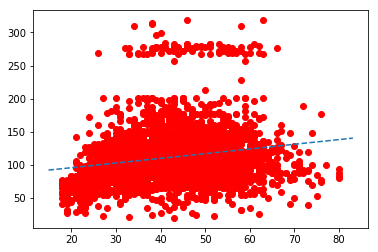

In [3]:
# Experiment 3 - Fit wage as a function of age
reg = LinearRegression().fit(age, wage)
print ("Coefficient is", reg.coef_[0])
print ("Intercept is", reg.intercept_)
# The Coefficient is 0.70727593
# The Intercept is 81.70473544
plt.plot(age, wage, 'ro')
abline(reg.coef_[0], reg.intercept_[0])

In [4]:
# Experiment 4 - Predict and Score
predict = reg.predict(age_test)
print("The Linear R^2 is", reg.score(age_test, wage_test))
# A low R^2 means that the model fits the data very poorly

The Linear R^2 is 0.03297729717439146


R^2 is 0.09295568749270755


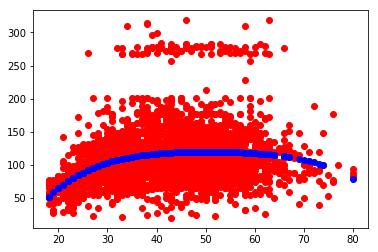

In [5]:
# Experiment 5 - Fitting a 4th order
poly = PolynomialFeatures(4)
age4 = poly.fit_transform(age_train)
reg4 = LinearRegression().fit(age4, wage_train)

polypred = reg4.predict(poly.fit_transform(age_test))
plt.plot(age, wage, 'ro')
plt.plot(age_test, polypred, 'bo')
score = reg4.score(poly.fit_transform(age_test), wage_test)
print("R^2 is", score)

In [6]:
# Experiment 6 - Adding a Ridge to the 4th order
model = make_pipeline(PolynomialFeatures(4), Ridge(alpha = 0.1))
model.fit(age_train, wage_train)
print("Ridge Coefficients are:", model.steps[1][1].coef_)
print("4th Order Coefficients are:", reg4.coef_)
# The coefficients for the penalized model have lower coefficients than the unpenalized ones.
# Expected because our alpha value is above 0. The coefficients will be lower if we increase alpha.

score = model.steps[1][1].score(poly.fit_transform(age_test), wage_test)
print("R^2 is", score)
# The score for 4th order and regularized 4th order seem to be rather similar. Maybe because alpha is too low to matter

Ridge Coefficients are: [[ 0.00000000e+00  2.21172258e+01 -6.03458458e-01  7.52173676e-03
  -3.63478685e-05]]
4th Order Coefficients are: [[ 0.00000000e+00  2.21773753e+01 -6.05553423e-01  7.55248045e-03
  -3.65091677e-05]]
R^2 is 0.092960825950683


/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.6707e-18): result may not be accurate.
  overwrite_a=True).T


In [7]:
# Experiment 7: Find best value for alpha
model2 = make_pipeline(PolynomialFeatures(4), RidgeCV(alphas = [0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0]))
model2.fit(age_train, wage_train)
print("The best alpha is", model2.steps[1][1].alpha_)

The best alpha is 1.0


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


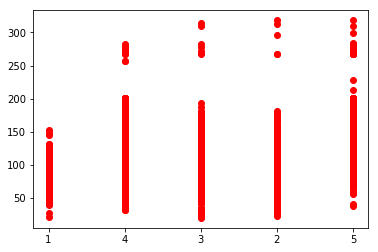

In [8]:
# Experiment 8 - Adding another Feature
x = data[['age', 'education']]
# Only keep the numerical value in education
x['education'] = x['education'].str[0]
y = data['wage']
plt.plot(x['education'], y, 'ro')
# Looks like there might be a relation between education and wage

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
# Fitting a linear model
linear = LinearRegression().fit(x, y)
predict = linear.predict(x_test)
RMSE = mean_squared_error(y_test, predict)
print("The RMSE is", RMSE)
print("The R^2 is", linear.score(x_test, y_test))
# The R^2 is much higher than just age alone.

The RMSE is 1137.0647980811918
The R^2 is 0.2863294397270699


In [11]:
# Fitting a 4th order
poly = PolynomialFeatures(4)
x4 = poly.fit_transform(x_train)
x4_reg = LinearRegression().fit(x4, y_train)
score = x4_reg.score(poly.fit_transform(x_test), y_test)
predict = x4_reg.predict(poly.fit_transform(x_test))
RMSE = mean_squared_error(y_test, predict)
print("The RMSE is", RMSE)
print("The R^2 is", score)
# In the 4th order, the R^2 is a little bit higher than the linear model
# The RMSE is also slightly lower.
# 4th order seems to be a slightly better fit

The RMSE is 1086.4035480004366
The R^2 is 0.3181266097654637


In [12]:
# Adding regularization to the 4th order
model = make_pipeline(PolynomialFeatures(4), Ridge(alpha = 0.1))
model.fit(x_train, y_train)
predict = model.predict(x_test)
RMSE = mean_squared_error(y_test, predict)
score = model.steps[1][1].score(poly.fit_transform(x_test), y_test)
print("The RMSE is", RMSE)
print("The R^2 is", score)

# The R^2 with regularization is very similar to R^2 without regularization
# The RMSE is slightly worse (almost negligible). 
# With R^2 and RMSE being slightly worse, it seems regularization with an alpha of 0.1 is a worse fit than no regularization

The RMSE is 1085.657021540489
The R^2 is 0.3185951617405388


/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.63885e-18): result may not be accurate.
  overwrite_a=True).T


In [13]:
# Choosing the best alpha value
model2 = make_pipeline(PolynomialFeatures(4), RidgeCV(alphas = [0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0]))
model2.fit(x_train, y_train)
print("The best alpha is", model2.steps[1][1].alpha_)

The best alpha is 0.1


In [14]:
# Calculating RMSE and R^2 with the best alpha
mode3 = make_pipeline(PolynomialFeatures(4), Ridge(model2.steps[1][1].alpha_))
mode3.fit(x_train, y_train)
predict = mode3.predict(x_test)
RMSE = mean_squared_error(y_test, predict)
score = mode3.steps[1][1].score(poly.fit_transform(x_test), y_test)
print("The RMSE is", RMSE)
print("The R^2 is", score)

The RMSE is 1085.657021540489
The R^2 is 0.3185951617405388


/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.63885e-18): result may not be accurate.
  overwrite_a=True).T
